# Hypothesis: Countries who prioritize education spending will have a larger percentage of their children start primary school.

I will use the percentage of government expenditure used on education (SE.XPD.TOTL.GB.ZS) as my independent variable,  and the percentage of the school age population that begins the first grade (SE.PRM.GINT.ZS) as my dependent variable for my regression analysis.  These indicators are defined by the Worldbanks Metadata Glossary as follows:

SE.XPD.TOTL.GB.ZS - General government expenditure on education (current, capital, and transfers) is expressed as a percentage of total general government expenditure on all sectors (including health, education, social services, etc.). It includes expenditure funded by transfers from international sources to government. General government usually refers to local, regional and central governments.


SE.PRM.GINT.ZS - Gross intake ratio in first grade of primary education is the number of new entrants in the first grade of primary education regardless of age, expressed as a percentage of the population of the official primary entrance age.  Because the gross intake ratio includes all new entrants regardless of age, it can exceed 100 percent in some situations, such as immediately after fees have been abolished or when the number of reenrolled children is large.

We will be exploring for a coorelation betwen the two indicators that are given named constants below.  This first cell will also establish the _author_ variable and import the pandas library as pd.

In [19]:
__author__ = "730366999"
EDUCATION_SPENDING: str = "SE.XPD.TOTL.GB.ZS"
INTAKE_RATIO: str = "SE.PRM.GINT.ZS"

import pandas as pd

We will us pandas read_csv method to the read databank_education_2018.csv file from our data directory and return a pandas DataFrame object that will be pointed to by the variable data_table.

In [20]:
data_table = pd.read_csv("../../data/databank_education_2018.csv")

Here we use the shape attribute to display the geometry of our DataFrame object (number of rows and columns) and the head method to see a preview of the first 10 rows of our table.  There are 94 columns in our data_table object, and 244 rows.  The output shown below in the Jupyter notebook doesn't let you see all the columns.

In [21]:
print(data_table.shape)
data_table.head(10)

(244, 94)


,Country,SE.COM.DURS,SE.ENR.PRIM.FM.ZS,SE.ENR.PRSC.FM.ZS,SE.ENR.SECO.FM.ZS,SE.ENR.TERT.FM.ZS,SE.PRE.DURS,SE.PRE.ENRL.TC.ZS,SE.PRE.ENRR,SE.PRE.ENRR.FE,...,SH.DYN.1014,SH.DYN.1519,SH.DYN.2024,SL.TLF.TOTL.FE.ZS,SL.TLF.TOTL.IN,SL.UEM.TOTL.FE.ZS,SL.UEM.TOTL.MA.ZS,SL.UEM.TOTL.ZS,SP.POP.0014.TO.ZS,SP.POP.1564.TO.ZS
0,Afghanistan,9.0,0.66691,0.63602,0.57098,0.34523,1.0,NaN,NaN,NaN,...,2.000000,13.800000,17.600000,21.247021,10319282.0,13.920000,10.290000,11.060000,43.090176,54.324898
1,Albania,9.0,1.03765,1.01730,1.00539,1.36299,5.0,17.09409,80.498734,80.790977,...,1.100000,1.800000,1.900000,42.190687,1400072.0,11.870000,12.620000,12.300000,17.672874,68.582390
2,Algeria,10.0,0.95499,NaN,NaN,1.39722,1.0,NaN,NaN,NaN,...,1.700000,2.700000,3.300000,20.126974,12589369.0,20.490000,9.720000,11.890000,30.148679,63.488825
3,Andorra,10.0,NaN,NaN,NaN,NaN,3.0,13.27711,NaN,NaN,...,0.500000,1.400000,2.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,6.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,6.400000,13.100000,19.900000,50.202910,12705650.0,7.280000,6.720000,7.000000,46.808925,50.974702
5,Antigua and Barbuda,11.0,0.99208,0.97924,0.96286,NaN,5.0,NaN,70.253601,74.025070,...,1.000000,2.500000,3.200000,NaN,NaN,NaN,NaN,NaN,22.081092,69.119083
6,Arab World,9.0,0.94617,0.94833,0.95186,1.09935,3.0,21.16757,27.001801,26.855440,...,2.923226,6.268086,8.017785,20.368759,134761988.0,19.903642,7.788688,10.256798,32.780436,62.661687
7,Argentina,14.0,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,...,1.100000,3.500000,4.900000,43.001857,20551682.0,10.540000,8.230000,9.220000,24.760934,64.121277
8,Armenia,12.0,0.99961,1.02283,1.03762,1.24788,3.0,6.27090,38.021290,39.659691,...,1.000000,2.300000,2.700000,44.231575,1245626.0,20.400000,17.830000,18.969999,20.633422,68.112760
9,Aruba,13.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.802447,68.646606


We will create a new pandas DataFrame by indexing data_table with a list of the columns that we want to be in the new DataFrame, and assign this new object to the selected_data variable.  The list of columns we use contains the string "Country" and our two named constants set up in the first code cell.  Then we will preview the first 10 rows.

In [22]:
selected_data = data_table[["Country", EDUCATION_SPENDING, INTAKE_RATIO]]
selected_data.head(10)


,Country,SE.XPD.TOTL.GB.ZS,SE.PRM.GINT.ZS
0,Afghanistan,NaN,110.77532
1,Albania,NaN,109.09234
2,Algeria,NaN,101.88002
3,Andorra,19.323059,NaN
4,Angola,NaN,NaN
5,Antigua and Barbuda,NaN,98.51904
6,Arab World,NaN,96.21463
7,Argentina,NaN,NaN
8,Armenia,NaN,91.89196
9,Aruba,NaN,NaN


We will use the notna method to build a new DataFrame that contains only the rows from selected_data that have numbers in both of the indicator columns that we have selected.  This new DataFrame will be pointed to by the variable complete_data.  We print the output of the shape method to see how many rows of data we have left with both values populated, and then use the head method to display the first 10 rows of the complete_data DataFrame object.

In [23]:
complete_data = selected_data[selected_data[EDUCATION_SPENDING].notna() & selected_data[INTAKE_RATIO].notna()]
print(complete_data.shape)
complete_data.head(10)


(52, 3)


,Country,SE.XPD.TOTL.GB.ZS,SE.PRM.GINT.ZS
12,Azerbaijan,7.435460,94.85142
19,Belize,21.365290,98.49042
20,Benin,17.709181,146.92009
22,Bhutan,22.766460,105.14864
30,Burkina Faso,22.661169,111.09734
31,Burundi,19.919870,128.05538
33,Cambodia,8.838980,104.57965
34,Cameroon,16.883160,116.76714
36,Caribbean small states,18.584000,89.93744
42,Colombia,15.982620,113.54630


We will use the complete_data DataFrames sort_values method to produce a new DataFrame object that has the rows sorted in descending order by the EDUCATION_SPENDING indicator.  The variable sorted_data will point to this.

In [24]:
sorted_data = complete_data.sort_values(by = EDUCATION_SPENDING, ascending = False)
sorted_data.head(10)

,Country,SE.XPD.TOTL.GB.ZS,SE.PRM.GINT.ZS
193,Sierra Leone,32.473221,171.84957
46,Costa Rica,26.086670,110.77016
84,Guatemala,23.749540,105.26949
22,Bhutan,22.766460,105.14864
30,Burkina Faso,22.661169,111.09734
221,Togo,21.769091,141.65741
190,Senegal,21.529409,94.74565
19,Belize,21.365290,98.49042
218,Tanzania,20.560011,109.14532
31,Burundi,19.919870,128.05538


We will use pandas to produce a scatter plot of EDUCATION_SPENDING vs INTAKE_RATIO.  Using the xlabel, ylabel, and title variables to label the graph.

<AxesSubplot:title={'center':'1st grade intake ratio vs. % of govt. spending on education'}, xlabel='percentage of govt. spending on education', ylabel='1st grade intake ratio'>

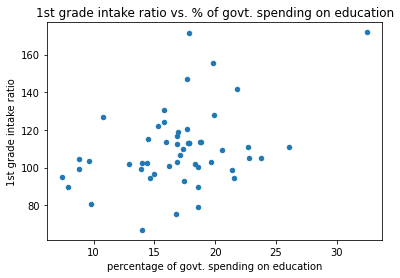

In [30]:
sorted_data.plot.scatter(x=EDUCATION_SPENDING, y=INTAKE_RATIO, title="1st grade intake ratio vs. % of govt. spending on education", ylabel="1st grade intake ratio", xlabel="percentage of govt. spending on education")


In this cell we will extract the two data columns from the DataFrame object as Series objects, and then use the Series corr method to see how well the correlate to eachother.

In [26]:
left_column = sorted_data[EDUCATION_SPENDING]
right_column = sorted_data[INTAKE_RATIO]

print(f"the correlation between percentage of governent expenditure on education, and percentage of kids starting first grade {right_column.corr(left_column)}")



the correlation between percentage of governent expenditure on education, and percentage of kids starting first grade 0.4020483769528363


## Our analysis finds a 0.4020 correlation.

This is considered a weak to moderate correlation (https://www.dummies.com/education/math/statistics/how-to-interpret-a-correlation-coefficient-r/).  One thing to bear in mind is that there is a lack of reporting standards, and of the 244 rows of data in our data set, only 52 had both of these indicators, and only 39 of these rows were individual countries.  There are 195 countries in the world, so some of these 244 rows are regional aggregations of values, so we could only look at the relationship between SE.XPD.TOTL.GB.ZS and SE.PRM.GINT.ZS for about 1/5 of the countries.  It's impossible to determine causality by such an analysis.  Both of these indicators could possibly be driven by another factor that wasn't analyzed, and if we had data from the remaining 156 countries, the correlation value could change drastically.